# 4장 모델 훈련
## EPOCH 3기 한우림

### 4.2.1 배치 경사 하강법(batch gradient descent)
- 편도함수: 각 모델 파라미터 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 함
- 배치 경사 하강법: 매 경사 하강법 스텝에서 전체 훈련 세트 $X$에 대해 계산하는 알고리즘



In [ ]:
# 4.1.1 정규방정식 공식 테스트를 위해 선형처럼 보이는 데이터 생성

import numpy as np

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0=1 을 추가

In [ ]:
# 4.2.1 배치 경사 하강법 알고리즘 구현

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta*gradients

### 4.6.4 소프트맥스 회귀
**로지스틱 회귀 모델을 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화**


In [ ]:
# 4.6.4 소프트맥스 회귀 구현

from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, (2,3)]  # 꽃잎 길이, 너비
y = iris["target"]

### 12번 연습문제
12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현 (사이킷런 사용 x)

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
# 사이킷런을 사용하지 않아야 하므로 직접 함수를 정의함

# softmax 함수 생성
def softmax(z):
    exp = np.exp(z - np.max(z, axis=1, keepdims=True)) # keepdims: 차원 유지하여 합계를 구함
    return exp / np.sum(exp, axis=1, keepdims=True)


# cross entropy func
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # 1e-9: 아주 작은 값을 추가하여 로그 값이 음수가 나오는 것을 방지


# gradient 계산
def compute_gradient(X, y_true, y_pred):
    m = X.shape[0]
    return (1 / m) * X.T @ (y_pred - y_true)


# 클래스를 원-핫 인코딩하는 함수 정의
def one_hot_encoder(y, num_classes):
    m = len(y)
    one_hot = np.zeros((m, num_classes))
    one_hot[np.arange(m), y.flatten()] = 1
    return one_hot


# 정규화
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


# 소프트맥스 회귀 함수 생성
def softmax_regression(X_train, y_train, X_val, y_val, alpha=0.1, epochs=1000, tolerance=1e-4):
    n_features, n_classes = X_train.shape[1], y_train.shape[1]
    W = np.random.randn(n_features, n_classes) * 0.01
    best_loss = float('inf')
    patience, patience_counter = 10, 0
    loss_history, val_loss_history = [], []

    for epoch in range(epochs):
        y_pred = softmax(X_train @ W)
        loss = compute_loss(y_train, y_pred)
        y_val_pred = softmax(X_val @ W)
        val_loss = compute_loss(y_val, y_val_pred)
        W -= alpha * compute_gradient(X_train, y_train, y_pred)

        loss_history.append(loss)
        val_loss_history.append(val_loss)

        if val_loss < best_loss:
            best_loss, patience_counter = val_loss, 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"조기 종료: epoch {epoch+1}")
                break

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss = {loss:}, Val Loss = {val_loss:}")

    return W, loss_history, val_loss_history

In [ ]:
# 데이터 로드 및 전처리
iris = load_iris()
X, y = iris.data, iris.target.reshape(-1, 1)
y_one_hot = one_hot_encoder(y, num_classes=3)
X_scaled = standardize(X)

# train, validation 분리
split_idx = int(0.8 * len(X_scaled))
X_train, X_val = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_val = y_one_hot[:split_idx], y_one_hot[split_idx:]

# 모델 훈련
W, loss_history, val_loss_history = softmax_regression(X_train, y_train, X_val, y_val, alpha=0.1, epochs=1000)

Epoch 0: Train Loss = 1.1074655095678385, Val Loss = 1.0903276705600442
Epoch 100: Train Loss = 0.39582129417575085, Val Loss = 0.4725421984989708
Epoch 200: Train Loss = 0.3674458028112379, Val Loss = 0.43059635703164617
Epoch 300: Train Loss = 0.3545836992463793, Val Loss = 0.40833969367428435
Epoch 400: Train Loss = 0.34688139793197315, Val Loss = 0.39442696810936095
Epoch 500: Train Loss = 0.34165837553221023, Val Loss = 0.38526130709812395
Epoch 600: Train Loss = 0.3378119110092644, Val Loss = 0.37901546589651514
Epoch 700: Train Loss = 0.3348052537385372, Val Loss = 0.3746596852122736
Epoch 800: Train Loss = 0.3323504762364234, Val Loss = 0.37157787176031803
Epoch 900: Train Loss = 0.33028143664806403, Val Loss = 0.36938294352442


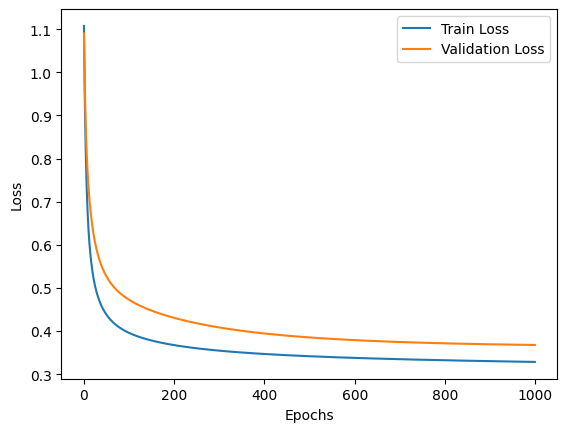

In [ ]:
# 그래프
plt.plot(loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()